In [2]:
# 5420 - HW3
# Haoran Yang

In [3]:
# ======================================
# Import Necessary Libraries
# ======================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")


In [24]:
pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 37.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 36.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 38.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
from skimpy import skim


In [4]:
# ======================================
# 1. Data Loading and Initial Processing
# ======================================

# Load the dataset
try:
    df = pd.read_csv("XYZloan_default_selected_vars.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'XYZloan_default_selected_vars.csv' was not found.")
    # You may need to check the file path or name.
    raise

# Replace -99 with NaN to represent missing values
df.replace(-99, np.nan, inplace=True)
print("Replaced -99 with NaN.")

# Define the variables for analysis
selected_vars = [
    "AP001",
    "AP003",
    "AP008",
    "CR009",
    "CR015",
    "CR019",
    "PA022",
    "PA023",
    "PA029",
    "TD001",
    "TD005",
    "TD006",
    "TD009",
    "TD010",
    "TD014",
    "loan_default",
]

# Identify categorical variables (even if they are numeric in the data)
categorical_vars = [
    "AP001",
    "AP003",
    "AP008",
    "CR015",
    "CR019",
    "PA022",
    "PA023",
    "TD001",
    "TD005",
    "TD006",
    "TD009",
    "TD010",
    "TD014",
]

# Variables to be binned (continuous variables)
continuous_vars_to_bin = ["CR009", "PA029"]

# Target variable
target_var = "loan_default"

# Ensure all selected variables are present in the dataframe
missing_vars = [var for var in selected_vars if var not in df.columns]
if missing_vars:
    print(f"Warning: The following variables are missing from the dataset: {missing_vars}")
    # Remove missing variables from selected_vars and other lists
    selected_vars = [var for var in selected_vars if var in df.columns]
    categorical_vars = [var for var in categorical_vars if var in selected_vars]
    continuous_vars_to_bin = [var for var in continuous_vars_to_bin if var in selected_vars]
else:
    print("All selected variables are present in the dataset.")


Data loaded successfully.
Replaced -99 with NaN.
All selected variables are present in the dataset.



Analyzing variable: AP001


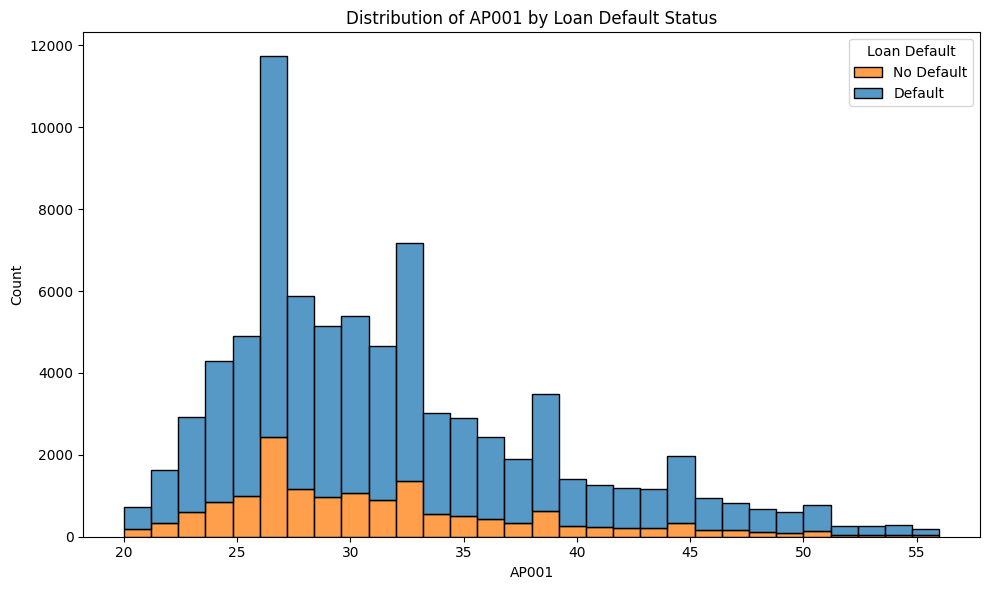

Business Insight:
 - Analyzing the distribution of 'AP001' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: AP003


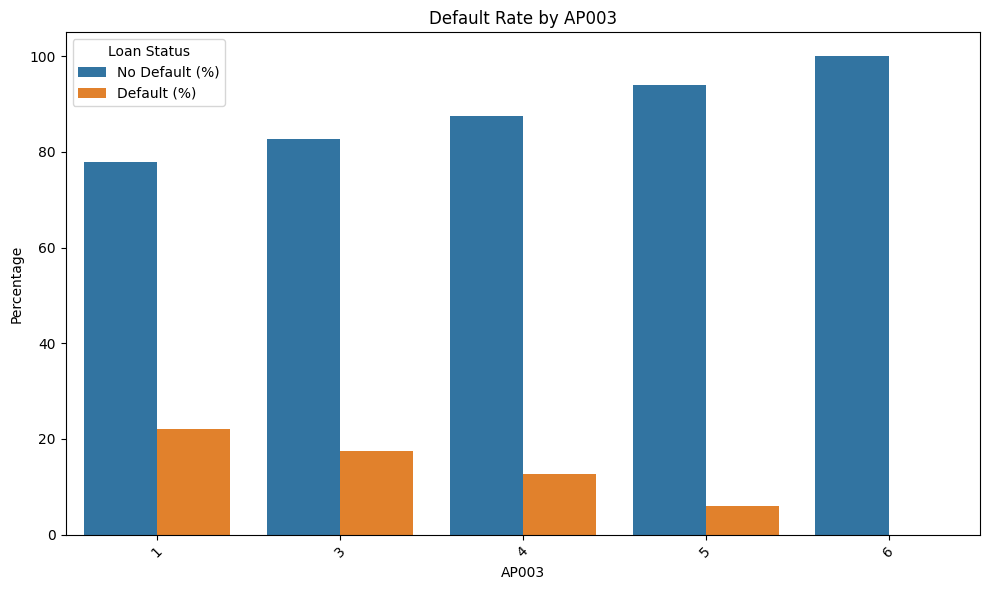

Business Insight:
 - Analyzing how different categories of 'AP003' relate to the likelihood of default.
 - Observations can help in identifying categories with higher risk.

Analyzing variable: AP008


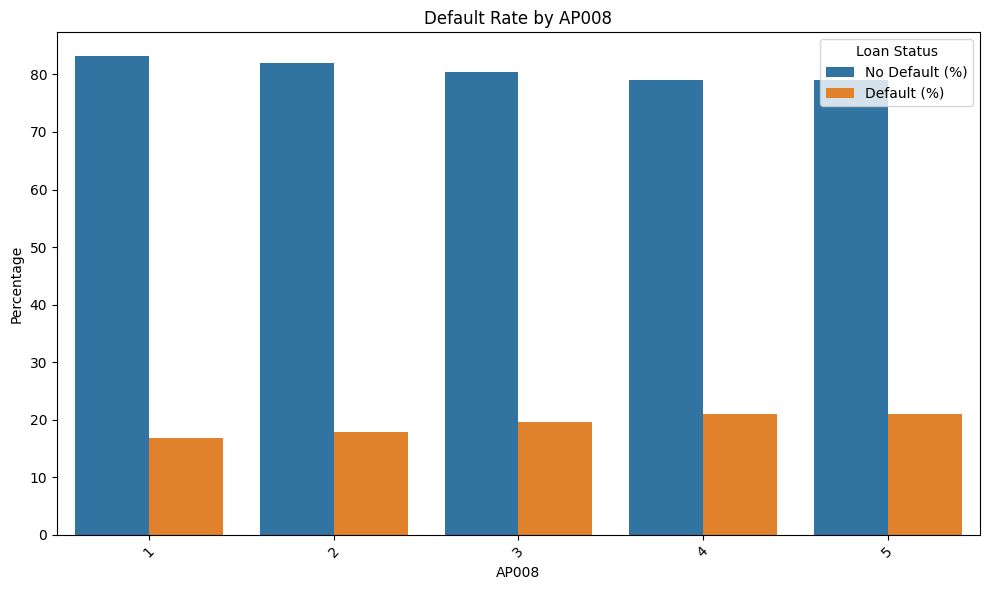

Business Insight:
 - Analyzing how different categories of 'AP008' relate to the likelihood of default.
 - Observations can help in identifying categories with higher risk.

Analyzing variable: CR009


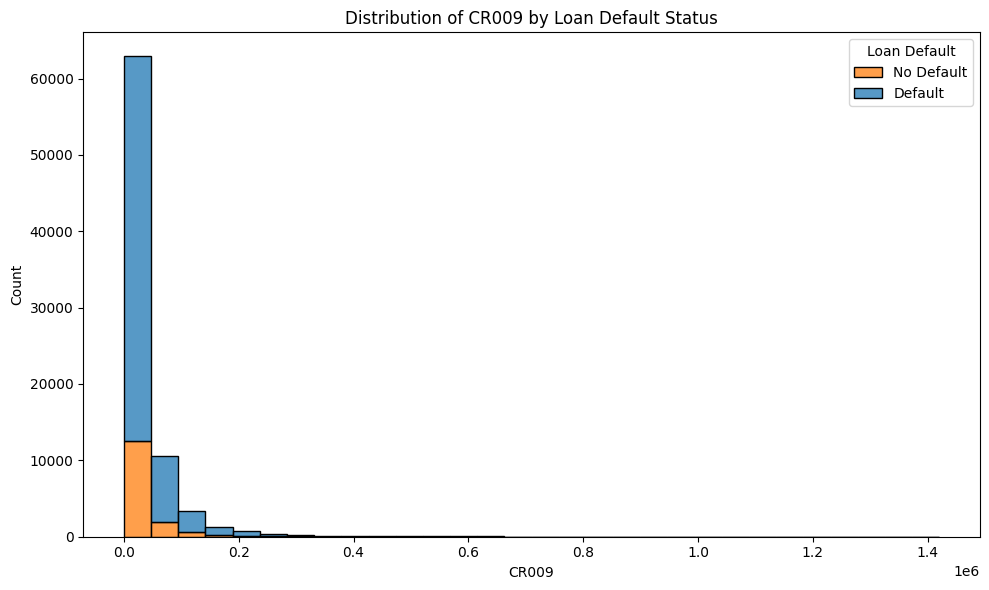

Business Insight:
 - Analyzing the distribution of 'CR009' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: CR015


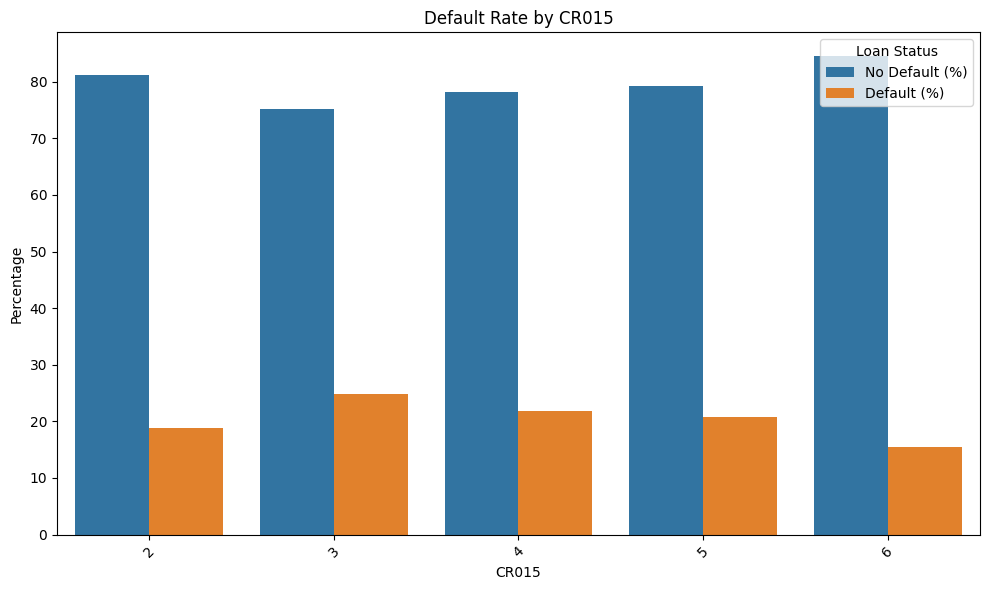

Business Insight:
 - Analyzing how different categories of 'CR015' relate to the likelihood of default.
 - Observations can help in identifying categories with higher risk.

Analyzing variable: CR019


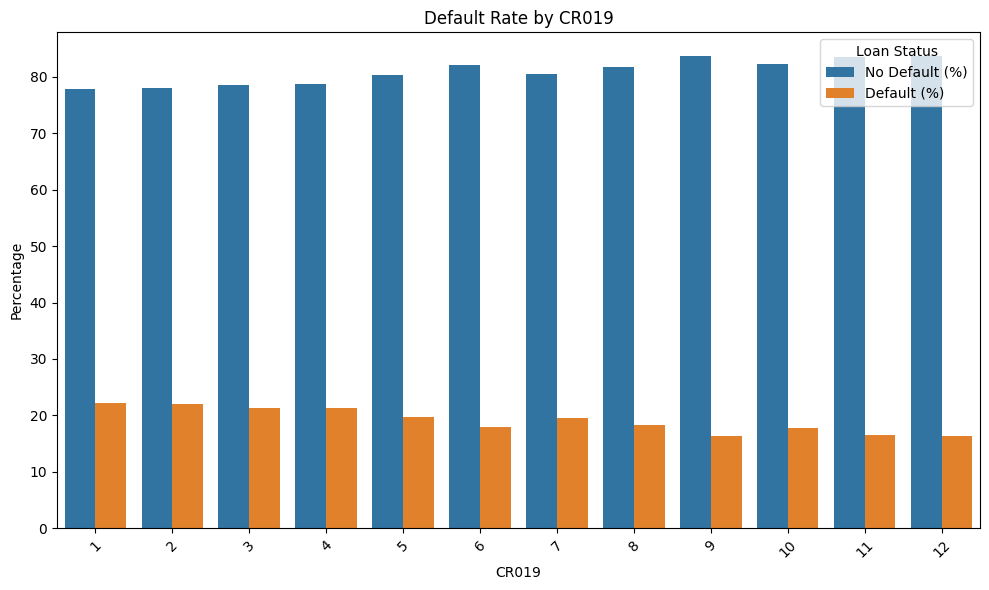

Business Insight:
 - Analyzing how different categories of 'CR019' relate to the likelihood of default.
 - Observations can help in identifying categories with higher risk.

Analyzing variable: PA022


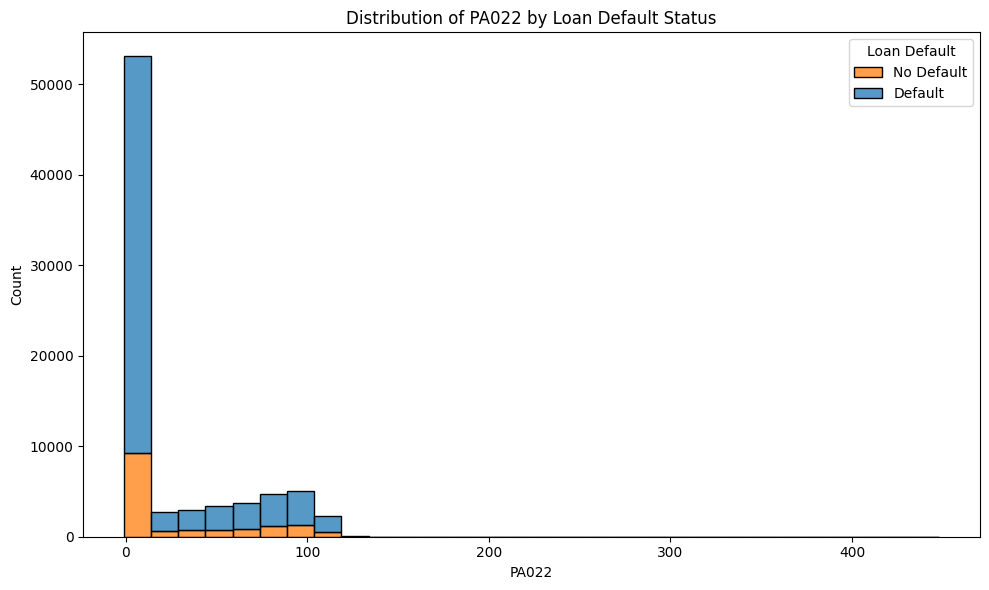

Business Insight:
 - Analyzing the distribution of 'PA022' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: PA023


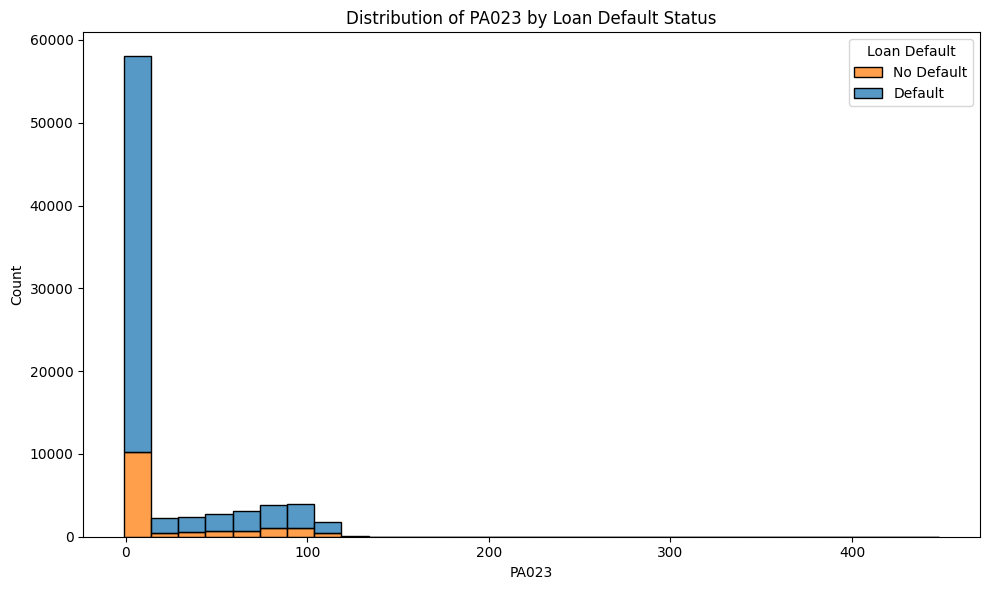

Business Insight:
 - Analyzing the distribution of 'PA023' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: PA029


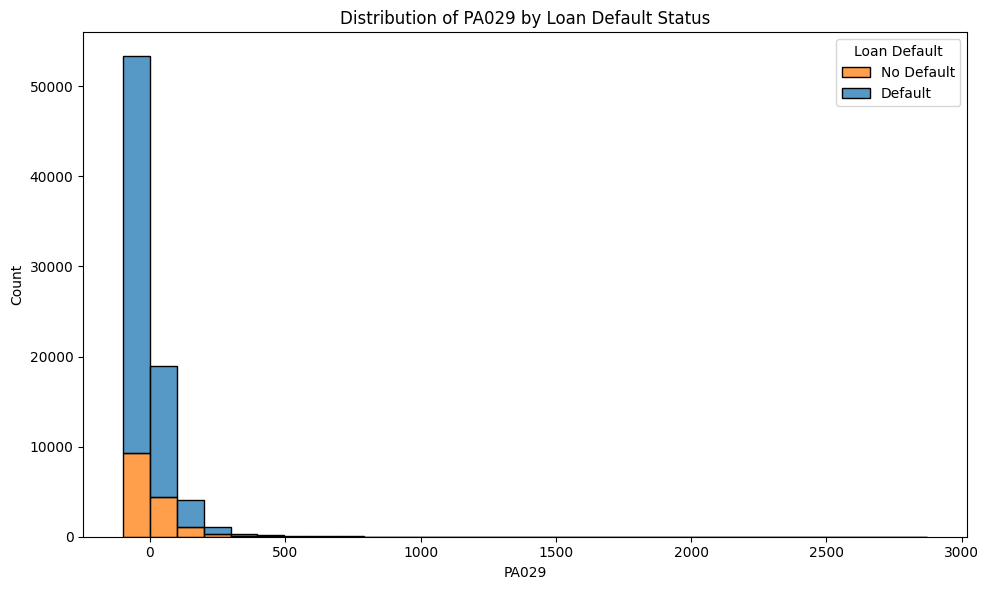

Business Insight:
 - Analyzing the distribution of 'PA029' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: TD001


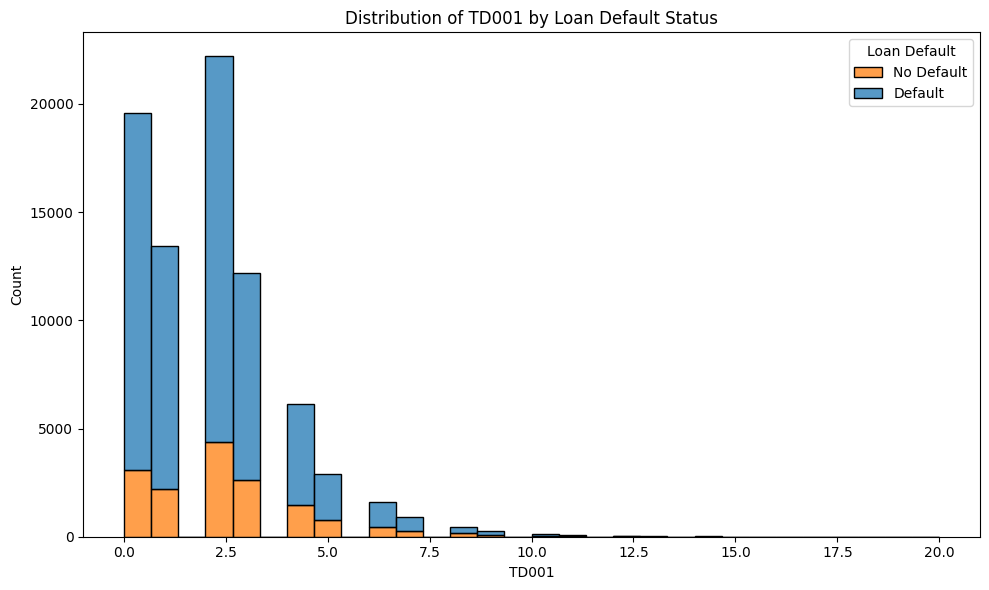

Business Insight:
 - Analyzing the distribution of 'TD001' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: TD005


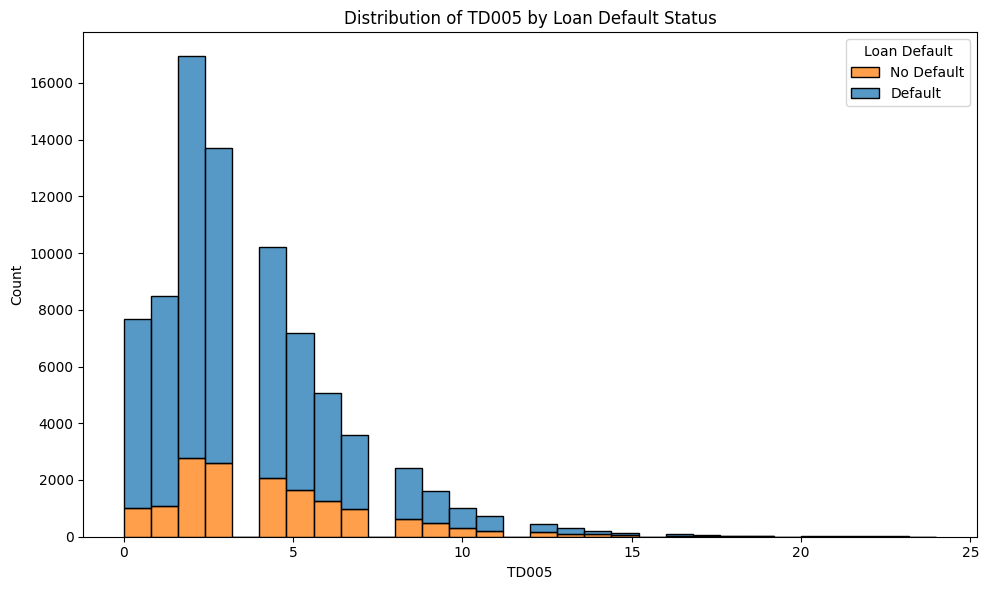

Business Insight:
 - Analyzing the distribution of 'TD005' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: TD006


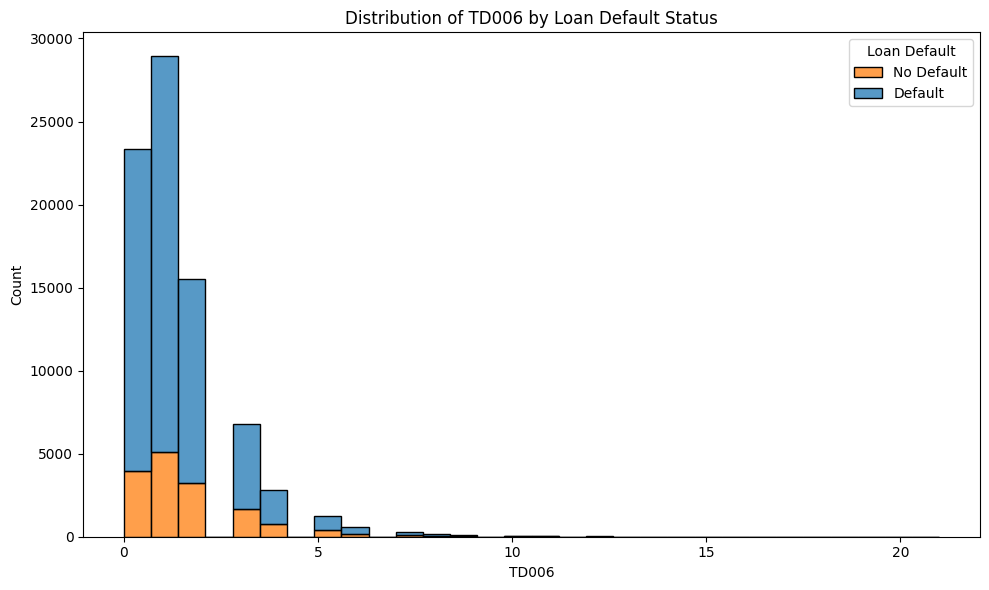

Business Insight:
 - Analyzing the distribution of 'TD006' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: TD009


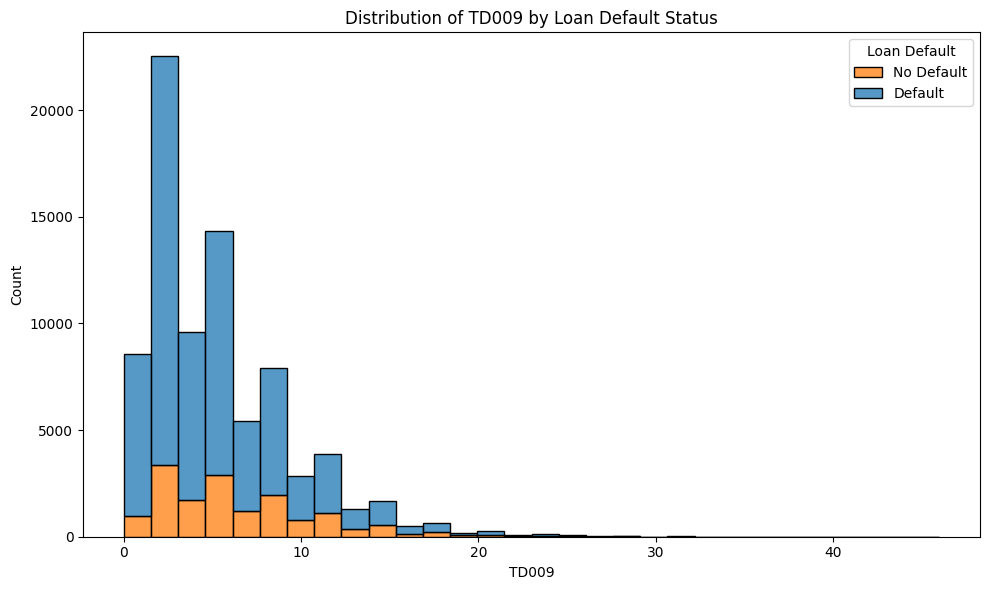

Business Insight:
 - Analyzing the distribution of 'TD009' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: TD010


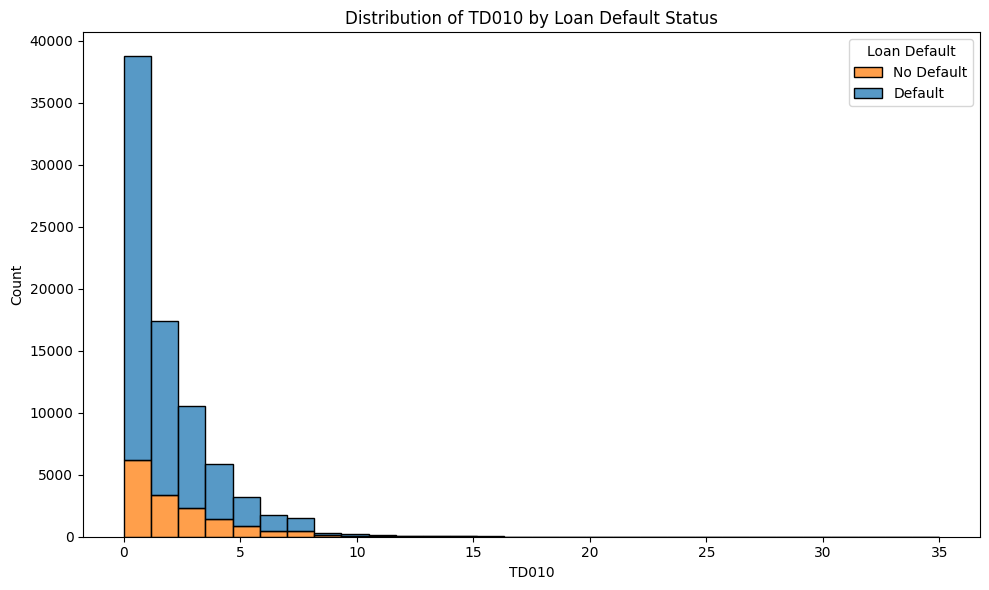

Business Insight:
 - Analyzing the distribution of 'TD010' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.

Analyzing variable: TD014


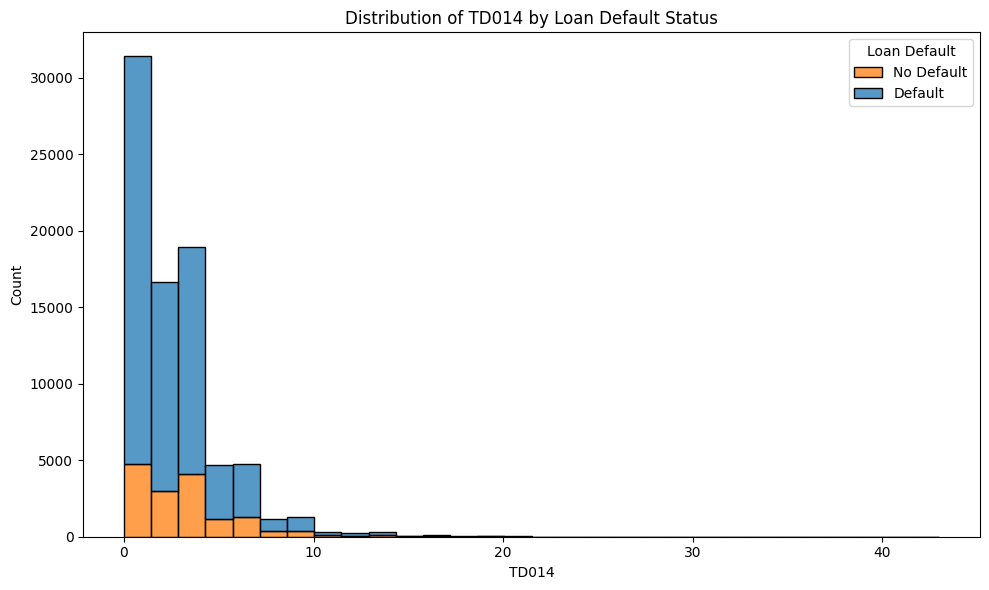

Business Insight:
 - Analyzing the distribution of 'TD014' and its relationship with default rates.
 - Identifying ranges where the default rate is higher can inform risk management.


In [5]:
# ======================================
# Exploratory Data Analysis (EDA)
# ======================================

# List of variables for EDA
eda_vars = [
    "AP001", "AP003", "AP008",
    "CR009", "CR015", "CR019",
    "PA022", "PA023", "PA029",
    "TD001", "TD005", "TD006",
    "TD009", "TD010", "TD014"
]

# Display the relationship between each variable and the target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the dataframe to preserve the original data
eda_df = df.copy()

# Replace -99 with NaN to represent missing values in EDA
eda_df.replace(-99, np.nan, inplace=True)

# Set up the matplotlib figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Loop through each variable for EDA
for var in eda_vars:
    print(f"\nAnalyzing variable: {var}")
    
    # Check if the variable exists in the dataframe
    if var not in eda_df.columns:
        print(f"Variable '{var}' not found in the dataset.")
        continue
    
    # Check if the variable is categorical or continuous
    if eda_df[var].dtype == 'object' or eda_df[var].nunique() < 20:
        # Treat as categorical variable
        # Create a crosstab of the variable with the target variable
        crosstab = pd.crosstab(eda_df[var], eda_df['loan_default'], normalize='index') * 100
        crosstab = crosstab.reset_index()
        crosstab.rename(columns={0: 'No Default (%)', 1: 'Default (%)'}, inplace=True)
        
        # Melt the dataframe for plotting
        crosstab_melted = crosstab.melt(id_vars=var, value_vars=['No Default (%)', 'Default (%)'], var_name='Status', value_name='Percentage')
        
        # Plot the default rate by category
        sns.barplot(x=var, y='Percentage', hue='Status', data=crosstab_melted)
        plt.title(f'Default Rate by {var}')
        plt.xlabel(var)
        plt.ylabel('Percentage')
        plt.legend(title='Loan Status')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Business Insight
        print("Business Insight:")
        print(f" - Analyzing how different categories of '{var}' relate to the likelihood of default.")
        print(" - Observations can help in identifying categories with higher risk.")
    else:
        # Treat as continuous variable
        # Plot the distribution of the variable grouped by the target variable
        sns.histplot(data=eda_df, x=var, hue='loan_default', multiple='stack', bins=30)
        plt.title(f'Distribution of {var} by Loan Default Status')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.legend(title='Loan Default', labels=['No Default', 'Default'])
        plt.tight_layout()
        plt.show()
        
        # Business Insight
        print("Business Insight:")
        print(f" - Analyzing the distribution of '{var}' and its relationship with default rates.")
        print(" - Identifying ranges where the default rate is higher can inform risk management.")


In [6]:
# ======================================
# 2. Data Splitting
# ======================================

# Separate features and target
X = df[selected_vars[:-1]]  # All features except the target variable
y = df[target_var]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (56000, 15)
Testing set size: (24000, 15)


In [7]:
# ======================================
# 3. Binning Continuous Variables
# ======================================

# Binning continuous variables into categorical bins
for var in continuous_vars_to_bin:
    if var in X_train.columns:
        print(f"Binning variable '{var}'.")
        # Create binned variables in the training set
        X_train[f"{var}_binned"], bins = pd.qcut(
            X_train[var], q=5, duplicates="drop", retbins=True
        )
        # Apply the same bins to the test set
        X_test[f"{var}_binned"] = pd.cut(
            X_test[var], bins=bins, include_lowest=True
        )
        # Drop the original continuous variable
        X_train.drop(columns=[var], inplace=True)
        X_test.drop(columns=[var], inplace=True)
        # Add the binned variable to categorical_vars
        categorical_vars.append(f"{var}_binned")
    else:
        print(f"Warning: '{var}' not found in X_train columns. Skipping binning for this variable.")

# Remove continuous variables that were binned from selected_vars
selected_vars = [var for var in selected_vars if var not in continuous_vars_to_bin]

print("Binning completed.")


Binning variable 'CR009'.
Binning variable 'PA029'.
Binning completed.


In [8]:
# ======================================
# 4. Missing Value Imputation
# ======================================

# Impute missing values in categorical variables with the most frequent category
print("Imputing missing values for categorical variables.")
categorical_imputer = SimpleImputer(strategy="most_frequent")
X_train[categorical_vars] = categorical_imputer.fit_transform(X_train[categorical_vars])
X_test[categorical_vars] = categorical_imputer.transform(X_test[categorical_vars])

# Ensure that all categorical variables are of type 'category'
for var in categorical_vars:
    X_train[var] = X_train[var].astype("category")
    X_test[var] = X_test[var].astype("category")

print("Missing value imputation completed.")


Imputing missing values for categorical variables.
Missing value imputation completed.


In [9]:
# ======================================
# 5. Handling Variables with Zero Counts in Categories
# ======================================

# Identify variables with categories that have zero counts in one of the target classes
variables_with_zero_counts = []

for var in categorical_vars:
    crosstab = pd.crosstab(X_train[var], y_train)
    if (crosstab == 0).any().any():
        print(f"\nVariable '{var}' has categories with zero counts in one of the target classes.")
        print("Crosstab:")
        print(crosstab)
        variables_with_zero_counts.append(var)
    else:
        print(f"Variable '{var}' has no zero counts in categories.")

if variables_with_zero_counts:
    print("\nVariables with zero counts in categories:", variables_with_zero_counts)
else:
    print("\nNo variables with zero counts in categories.")

# Note: We will handle zero counts during WoE encoding with smoothing


Variable 'AP001' has no zero counts in categories.

Variable 'AP003' has categories with zero counts in one of the target classes.
Crosstab:
loan_default      0     1
AP003                    
1             24533  6969
3             13913  2891
4              6551   970
5               153    12
6                 8     0
Variable 'AP008' has no zero counts in categories.
Variable 'CR015' has no zero counts in categories.
Variable 'CR019' has no zero counts in categories.

Variable 'PA022' has categories with zero counts in one of the target classes.
Crosstab:
loan_default      0     1
PA022                    
-1.0          30499  6274
 0.0             80    24
 1.0            103    46
 2.0            114    31
 3.0             91    31
...             ...   ...
 437.0            1     0
 440.0            1     0
 441.0            1     0
 445.0            0     1
 448.0            1     0

[163 rows x 2 columns]

Variable 'PA023' has categories with zero counts in one of the target c

In [10]:
# ======================================
# 6. WoE Encoding with Smoothing
# ======================================

# Define a function to calculate WoE with smoothing to handle zero counts
def calculate_woe_smoothing(data, feature, target, epsilon=0.5):
    temp = data.groupby(feature)[target].agg(["count", "sum"])
    temp.columns = ["Total", "Events"]
    temp["Non-Events"] = temp["Total"] - temp["Events"]
    # Apply smoothing by adding epsilon
    temp["Events"] += epsilon
    temp["Non-Events"] += epsilon
    # Calculate distributions
    temp["Dist_Events"] = temp["Events"] / temp["Events"].sum()
    temp["Dist_Non_Events"] = temp["Non-Events"] / temp["Non-Events"].sum()
    # Calculate WoE
    temp["WoE"] = np.log(temp["Dist_Non_Events"] / temp["Dist_Events"])
    return temp["WoE"].to_dict()

# Combine X_train and y_train for WoE calculation
train_data = pd.concat([X_train, y_train], axis=1)

# Apply the custom WoE encoding with smoothing to all categorical variables
print("\nApplying WoE encoding with smoothing.")
for var in categorical_vars:
    print(f"Processing variable '{var}'.")
    # Calculate WoE with smoothing
    woe_map = calculate_woe_smoothing(train_data, var, target_var)
    # Map the WoE values to the training and testing data
    X_train[var] = X_train[var].map(woe_map)
    X_test[var] = X_test[var].map(woe_map)
    # Convert variables to float type
    X_train[var] = X_train[var].astype(float)
    X_test[var] = X_test[var].astype(float)
    # Fill any NaN values in X_test resulting from unseen categories with zero
    X_test[var] = X_test[var].fillna(0)

print("WoE encoding completed.")



Applying WoE encoding with smoothing.
Processing variable 'AP001'.
Processing variable 'AP003'.
Processing variable 'AP008'.
Processing variable 'CR015'.
Processing variable 'CR019'.
Processing variable 'PA022'.
Processing variable 'PA023'.
Processing variable 'TD001'.
Processing variable 'TD005'.
Processing variable 'TD006'.
Processing variable 'TD009'.
Processing variable 'TD010'.
Processing variable 'TD014'.
Processing variable 'CR009_binned'.
Processing variable 'PA029_binned'.
WoE encoding completed.



Training Logistic Regression model.
Model training completed.

ROC AUC Score: 0.6562

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     19354
           1       0.44      0.01      0.02      4646

    accuracy                           0.81     24000
   macro avg       0.63      0.50      0.45     24000
weighted avg       0.74      0.81      0.72     24000



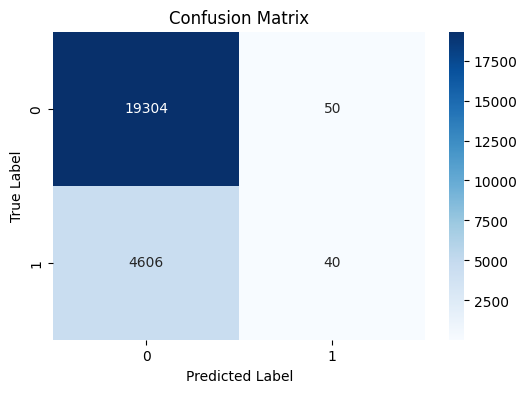

In [11]:
# ======================================
# 7. Model Training and Evaluation
# ======================================

# Initialize the Logistic Regression model
print("\nTraining Logistic Regression model.")
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)
print("Model training completed.")

# Predict probabilities on the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {auc_score:.4f}")

# Predict class labels on the test data
y_pred = model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


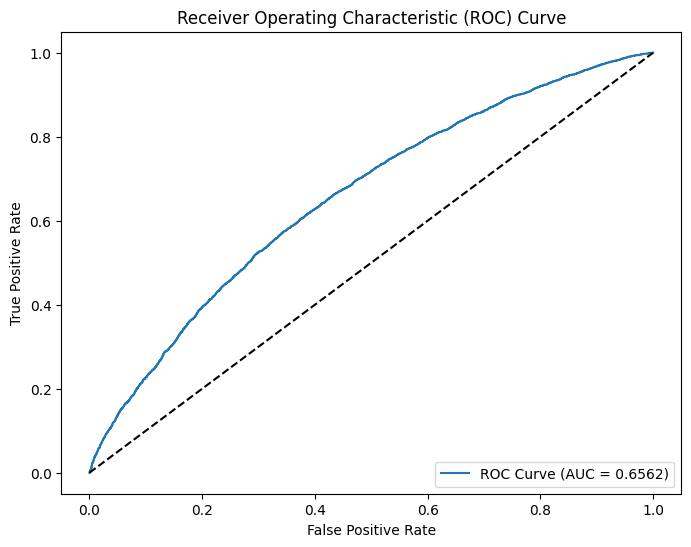

In [12]:
# ======================================
# 8. Plot ROC Curve
# ======================================

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for reference
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [18]:
# ======================================
# 9. Hyperparameter Tuning using GridSearchCV
# ======================================

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],      # Regularization strength
    'penalty': ['l1', 'l2'],           # Norm used in penalization
    'solver': ['liblinear', 'saga'],    # Solvers that support L1 penalty
}

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
print("\nPerforming hyperparameter tuning with GridSearchCV...")
grid_search.fit(X_train_selected, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score from GridSearchCV: {grid_search.best_score_:.4f}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_

# Predict probabilities on the test data
y_pred_proba_best = best_model.predict_proba(X_test_selected)[:, 1]

# Calculate ROC AUC score
auc_score_best = roc_auc_score(y_test, y_pred_proba_best)
print(f"\nROC AUC Score with Best Parameters: {auc_score_best:.4f}")



Performing hyperparameter tuning with GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC Score from GridSearchCV: 0.6528

ROC AUC Score with Best Parameters: 0.6562


In [20]:



# Function to compute the gains table
def compute_gains_table(y_true, y_scores, n_bins=10):
    # Create a DataFrame with true labels and predicted scores
    data = pd.DataFrame({'y_true': y_true, 'y_scores': y_scores})

    # Sort the data by predicted scores in descending order
    data.sort_values(by='y_scores', ascending=False, inplace=True)
    data.reset_index(drop=True, inplace=True)

    # Calculate the total number of events
    total_events = data['y_true'].sum()
    total_non_events = len(data) - total_events
    overall_event_rate = total_events / len(data)

    # Assign each observation to a bin
    data['Bin'] = pd.qcut(data.index, q=n_bins, labels=False)

    # Group the data by bin
    grouped = data.groupby('Bin', as_index=False)

    # Calculate metrics for each bin
    gains_table = grouped.agg({
        'y_true': ['count', 'sum']
    })

    gains_table.columns = ['Bin', 'Total', 'Events']
    gains_table['Bin'] = gains_table['Bin'] + 1  # Bins start at 1

    gains_table['Non-Events'] = gains_table['Total'] - gains_table['Events']
    gains_table['Event Rate'] = gains_table['Events'] / gains_table['Total']
    gains_table['Cumulative Events'] = gains_table['Events'].cumsum()
    gains_table['Cumulative Total'] = gains_table['Total'].cumsum()
    gains_table['Cumulative Event Rate'] = gains_table['Cumulative Events'] / gains_table['Cumulative Total']
    gains_table['Cumulative % of Events'] = gains_table['Cumulative Events'] / total_events * 100
    gains_table['Cumulative % of Total'] = gains_table['Cumulative Total'] / len(data) * 100
    gains_table['Lift'] = gains_table['Event Rate'] / overall_event_rate
    gains_table['Cumulative Lift'] = gains_table['Cumulative Event Rate'] / overall_event_rate

    return gains_table


In [21]:
# Function to plot gains chart
def plot_gains_chart(gains_table, model_name='Model'):
    plt.figure(figsize=(8, 6))
    plt.plot(gains_table['Cumulative % of Total'], gains_table['Cumulative % of Events'], marker='o')
    plt.plot([0, 100], [0, 100], linestyle='--', color='gray')
    plt.title(f'Gains Chart - {model_name}')
    plt.xlabel('Cumulative % of Data')
    plt.ylabel('Cumulative % of Events')
    plt.legend(['Model', 'Baseline'], loc='lower right')
    plt.grid(True)
    plt.show()

# Function to plot lift chart
def plot_lift_chart(gains_table, model_name='Model'):
    plt.figure(figsize=(8, 6))
    plt.plot(gains_table['Cumulative % of Total'], gains_table['Cumulative Lift'], marker='o')
    plt.plot([0, 100], [1, 1], linestyle='--', color='gray')
    plt.title(f'Lift Chart - {model_name}')
    plt.xlabel('Cumulative % of Data')
    plt.ylabel('Cumulative Lift')
    plt.legend(['Model', 'Baseline'], loc='upper right')
    plt.grid(True)
    plt.show()



Gains Table for Logistic Regression Model:
   Bin  Total  Events  Event Rate  Cumulative % of Events      Lift  \
0    1   2400     869    0.362083               18.704262  1.870426   
1    2   2400     714    0.297500               34.072320  1.536806   
2    3   2400     602    0.250833               47.029703  1.295738   
3    4   2400     526    0.219167               58.351270  1.132157   
4    5   2400     445    0.185417               67.929402  0.957813   
5    6   2400     403    0.167917               76.603530  0.867413   
6    7   2400     349    0.145417               84.115368  0.751184   
7    8   2400     296    0.123333               90.486440  0.637107   
8    9   2400     260    0.108333               96.082652  0.559621   
9   10   2400     182    0.075833              100.000000  0.391735   

   Cumulative Lift  
0         1.870426  
1         1.703616  
2         1.567657  
3         1.458782  
4         1.358588  
5         1.276725  
6         1.201648  
7     

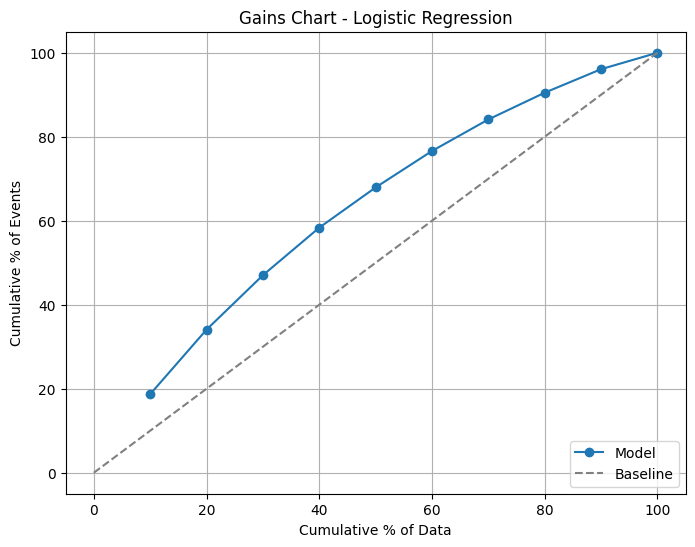

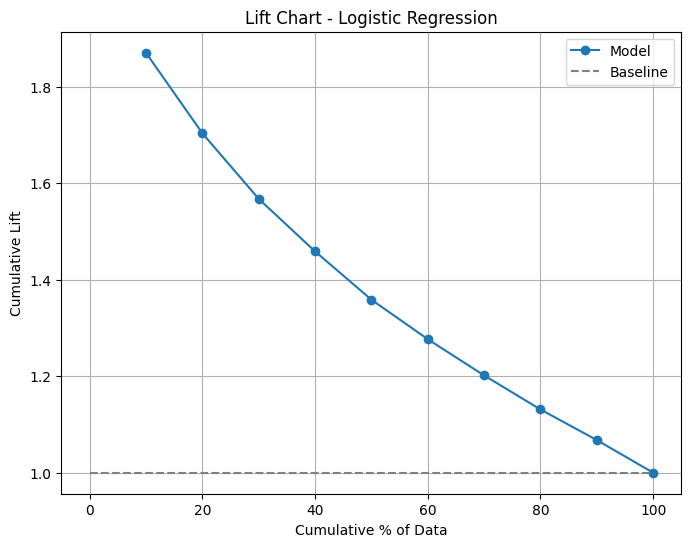

In [22]:
# Compute the gains table using your logistic regression model's predictions
gains_table = compute_gains_table(y_test, y_pred_proba, n_bins=10)

# Display the gains table
print("\nGains Table for Logistic Regression Model:")
print(gains_table[['Bin', 'Total', 'Events', 'Event Rate', 'Cumulative % of Events', 'Lift', 'Cumulative Lift']])

# Plot the gains chart
plot_gains_chart(gains_table, model_name='Logistic Regression')

# Plot the lift chart
plot_lift_chart(gains_table, model_name='Logistic Regression')
